In [716]:
%matplotlib inline 

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import cv2


import pickle
df = pd.read_pickle("/home/maksim/Documents/Art_dataset")

In [717]:
df

,sale_date,Price,Author,Art,Owner,Sign,Technique,Material,Nazi,Framed,...,year,deal_time_(utc),normalized_price,hasFollowers,hasAfter,isUntitled,isNumbered,normalized_estimatefrom,normalized_estimateto,Paths
0,10.02.2011,4857250,alberto giacometti,ANNETTE OR PORTRAIT D'ANNETTE AU PULL-OVER ROUGE,-,1,oil,canvas,0,0,...,2011,19:00,5471265.38,0,0,0.0,0.0,3647510.25,5471265.38,/home/maksim/Art_Images_cropped/alberto\ giaco...
1,09.05.2016,3250000,alberto giacometti,ATELIER I,-,1,oil,canvas,0,0,...,2016,23:00,3728226.00,0,0,0.0,0.0,2663018.57,3728226.00,/home/maksim/Art_Images_cropped/alberto\ giaco...
2,03.05.2013,13750,alberto giacometti,BUST II,-,1,lithograph,paper,0,1,...,2013,14:00,7682.11,0,0,0.0,1.0,5487.22,7682.11,/home/maksim/Art_Images_cropped/alberto\ giaco...
3,29.04.2011,11250,alberto giacometti,BUST OF MAN,-,1,lithograph,paper,0,1,...,2011,14:00,13638.75,0,0,0.0,1.0,9092.50,13638.75,/home/maksim/Art_Images_cropped/alberto\ giaco...
4,07.11.2012,734500,alberto giacometti,BUSTE,-,1,oil,canvas,0,0,...,2012,15:00,1670279.99,0,0,0.0,0.0,1113519.99,1670279.99,/home/maksim/Art_Images_cropped/alberto\ giaco...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12522,05.10.2015,1000000,zhang xiaogang,WASTE LAND NO. 3,-,1,oil,paper,0,1,...,2015,6:30,97424.96,0,0,0.0,1.0,69589.26,97424.96,/home/maksim/Art_Images_cropped/zhang\ xiaogan...
12523,05.10.2015,1125000,zhang xiaogang,WASTE LAND NO. 4,-,1,oil,paper,0,1,...,2015,6:30,97424.96,0,0,0.0,1.0,69589.26,97424.96,/home/maksim/Art_Images_cropped/zhang\ xiaogan...
12524,03.04.2011,9844000,zhang xiaogang,YELLOW BABY,-,1,oil,canvas,0,0,...,2011,10:30,1023031.45,0,0,0.0,0.0,730736.74,1023031.45,/home/maksim/Art_Images_cropped/zhang\ xiaogan...
12525,06.10.2019,2125000,zhang xiaogang,YELLOW BABY NO. 2 (FROM THE BLOODLINE SERIES),-,1,oil,canvas,0,0,...,2019,10:30,101979.43,0,0,0.0,1.0,76484.57,101979.43,/home/maksim/Art_Images_cropped/zhang\ xiaogan...


In [718]:
df.columns

Index(['sale_date', 'Price', 'Author', 'Art', 'Owner', 'Sign', 'Technique',
       'Material', 'Nazi', 'Framed', 'Size', 'square_m', 'Currency',
       'EstimateFrom', 'EstimateTo', 'ExhibitedNum', 'ProvenanceNum',
       'LiteratureNum', 'CataloguingLength', 'Time', 'City', 'Description',
       'tried_url', 'Image', 'date_of_birth', 'date_of_death', 'century',
       'nationality', 'sex', 'style', 'repeat_sale', 'feature1', 'feature2',
       'number_of_day', 'day_of_week', 'month', 'year', 'deal_time_(utc)',
       'normalized_price', 'hasFollowers', 'hasAfter', 'isUntitled',
       'isNumbered', 'normalized_estimatefrom', 'normalized_estimateto',
       'Paths'],
      dtype='object')

In [719]:
df = df[df.isNumbered == 0]
df.reset_index(drop=True, inplace=True)

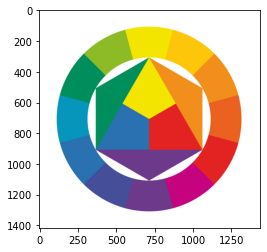

In [720]:
path = "/home/maksim/Documents/itten.jpg"
image = cv2.imread(path)[:,:,::-1]
plt.imshow(image)
plt.show()

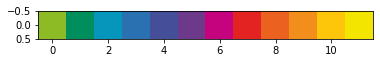

In [721]:
itten_colors = [
    image[300][510], image[400][300], image[700][250], image[1000][250], image[1200][500], image[1200][750],
image[1100][1000], image[1000][1100], image[750][1200], image[500][1200], image[300][900], image[300][700]
]

itten_colors_luv = [cv2.cvtColor(np.array([[x]]), cv2.COLOR_RGB2Luv)[0][0] for x in itten_colors]

plt.imshow([itten_colors])
plt.show()

In [722]:
def get_image(i):
    return cv2.imread(df.Paths[i])
def get_pixel(i, j, num):
    return np.array([[get_image(num)[i][j]]])
def plot_image(i):
    plt.imshow(get_image(i)[:,:,::-1])
    plt.show()

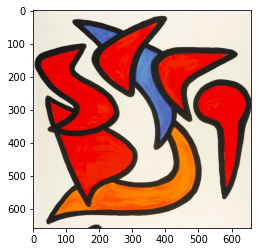

In [723]:
plot_image(101)

In [724]:
from sklearn.metrics.pairwise import euclidean_distances

def get_image_colors(image_index):
    luv_img = cv2.cvtColor(get_image(image_index), cv2.COLOR_BGR2LUV)
    closest_colors = np.argmin(euclidean_distances(luv_img.reshape(-1,3), itten_colors_luv),axis=1)
    v, c = np.unique(closest_colors, return_counts=True)
    c = c / c.sum()
    return v, c

In [725]:
def plot_freq(image_index):
    plot_image(image_index)
    image = get_image(image_index)
    freq_colors = get_image_colors(image_index)
    colors = np.array([])
    for j, i in enumerate(freq_colors[0]):
        itten_pixel = np.array([[itten_colors[int(i)]]])
        width = int(10*freq_colors[1][int(j)]) + 1
        height = 1
        resized = cv2.resize(itten_pixel, (width, height), interpolation = cv2.INTER_AREA)
        colors = np.append(colors, resized)
    colors = np.reshape(colors, (len(colors) // 3,-1))
    plt.imshow(np.array([colors]).astype(np.uint8))
    plt.show()
    


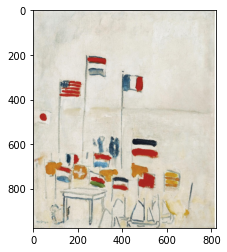

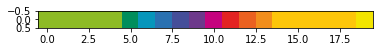

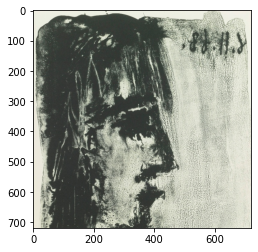

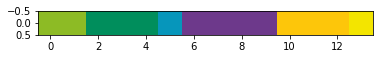

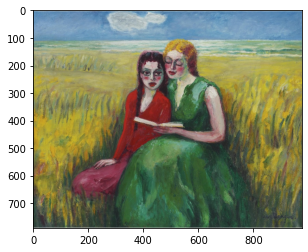

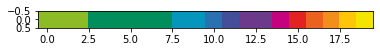

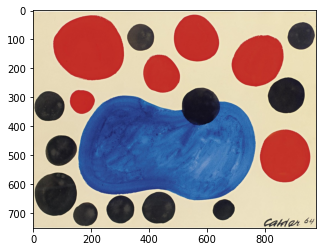

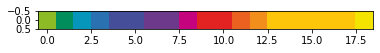

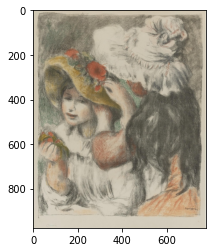

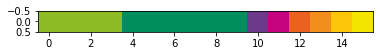

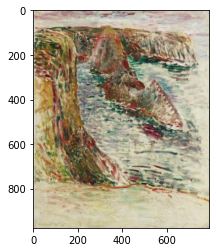

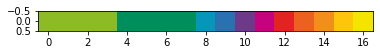

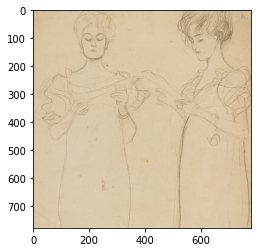

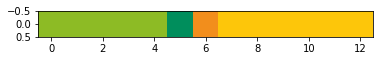

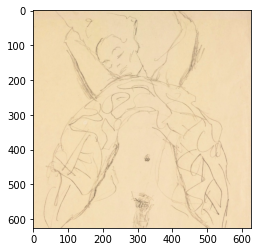

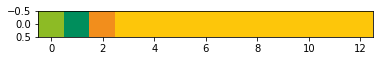

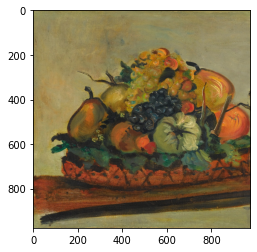

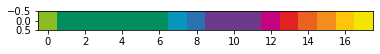

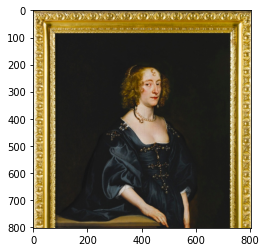

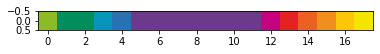

In [726]:
for i in np.random.choice(8000, 10):
    plot_freq(i)

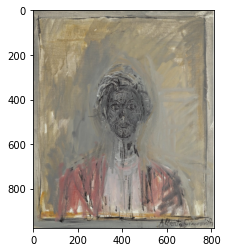

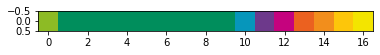

In [727]:
 plot_freq(0)

In [728]:
colors_freq = [get_image_colors(x) for x in np.arange(df.shape[0])]

In [729]:
l = []
for pair in colors_freq:
    colors_indexes = pair[0]
    freq = pair[1]
    for i in range(12):
        if i not in colors_indexes:
            freq = np.insert(freq, i, 0)
    l.append(freq)


In [730]:
df_colors = pd.DataFrame(l, columns=["салатовый","зеленый", "бирюзовый","синий","темно-синий","фиолетовый","розовый","красный","ярко-оранжевый","оранжевый","ярко-желтый","желтый"])

In [731]:
data = pd.concat([df, df_colors], axis=1)
data

,sale_date,Price,Author,Art,Owner,Sign,Technique,Material,Nazi,Framed,...,бирюзовый,синий,темно-синий,фиолетовый,розовый,красный,ярко-оранжевый,оранжевый,ярко-желтый,желтый
0,10.02.2011,4857250,alberto giacometti,ANNETTE OR PORTRAIT D'ANNETTE AU PULL-OVER ROUGE,-,1,oil,canvas,0,0,...,0.011368,0.000000,0.000000,0.042791,0.005413,0.000000,0.001104,0.006301,0.003399,0.004694
1,09.05.2016,3250000,alberto giacometti,ATELIER I,-,1,oil,canvas,0,0,...,0.000987,0.000000,0.000000,0.042864,0.002114,0.000000,0.000519,0.010282,0.000192,0.000000
2,07.11.2012,734500,alberto giacometti,BUSTE,-,1,oil,canvas,0,0,...,0.000000,0.000000,0.000000,0.299760,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,05.02.2008,5620500,alberto giacometti,BUSTE,-,1,oil,canvas,0,0,...,0.293923,0.000038,0.000000,0.011147,0.000000,0.000000,0.000000,0.000891,0.006580,0.011400
4,09.02.2005,50400,alberto giacometti,BUSTE D'HOMME OR TÊTE D'HOMME - RECTO TÊTE D'H...,-,1,ink,paper,0,0,...,0.000613,0.000000,0.000000,0.006157,0.000000,0.000000,0.000000,0.000000,0.934220,0.023912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9255,15.10.2007,328500,zhang xiaogang,UNTITLED (BLOODLINE SERIES),-,1,oil,canvas,0,0,...,0.578086,0.000000,0.000000,0.004650,0.000038,0.000000,0.000042,0.000722,0.003124,0.004868
9256,16.05.2007,132000,zhang xiaogang,UNTITLED (PORTRAIT),-,1,oil,paper,0,0,...,0.394479,0.001516,0.000000,0.001891,0.000322,0.000003,0.001012,0.002503,0.055805,0.146068
9257,04.04.2016,1087500,zhang xiaogang,WAITING SPIRITS,-,1,oil,paper,0,1,...,0.041799,0.004218,0.003791,0.041952,0.034178,0.036236,0.008693,0.209997,0.140109,0.000017
9258,03.04.2011,9844000,zhang xiaogang,YELLOW BABY,-,1,oil,canvas,0,0,...,0.406451,0.000000,0.000000,0.093307,0.000020,0.000000,0.000286,0.011754,0.218908,0.181495


In [732]:
import pickle
data.to_pickle("/home/maksim/Documents/data_Art_with_freq")

In [963]:
import pickle
data = pd.read_pickle("/home/maksim/Documents/data_Art_with_freq")

In [964]:
data.columns

Index(['sale_date', 'Price', 'Author', 'Art', 'Owner', 'Sign', 'Technique',
       'Material', 'Nazi', 'Framed', 'Size', 'square_m', 'Currency',
       'EstimateFrom', 'EstimateTo', 'ExhibitedNum', 'ProvenanceNum',
       'LiteratureNum', 'CataloguingLength', 'Time', 'City', 'Description',
       'tried_url', 'Image', 'date_of_birth', 'date_of_death', 'century',
       'nationality', 'sex', 'style', 'repeat_sale', 'feature1', 'feature2',
       'number_of_day', 'day_of_week', 'month', 'year', 'deal_time_(utc)',
       'normalized_price', 'hasFollowers', 'hasAfter', 'isUntitled',
       'isNumbered', 'normalized_estimatefrom', 'normalized_estimateto',
       'Paths', 'салатовый', 'зеленый', 'бирюзовый', 'синий', 'темно-синий',
       'фиолетовый', 'розовый', 'красный', 'ярко-оранжевый', 'оранжевый',
       'ярко-желтый', 'желтый'],
      dtype='object')

In [962]:
X = data[['салатовый','зеленый',  'бирюзовый', 'синий', 'темно-синий',
       'фиолетовый', 'розовый', 'красный', 'ярко-оранжевый', 'оранжевый',
       'ярко-желтый', 'желтый']].copy()
X

,салатовый,зеленый,бирюзовый,синий,темно-синий,фиолетовый,розовый,красный,ярко-оранжевый,оранжевый,ярко-желтый,желтый
0,0.073037,0.851894,0.011368,0.000000,0.000000,0.042791,0.005413,0.000000,0.001104,0.006301,0.003399,0.004694
1,0.008113,0.934928,0.000987,0.000000,0.000000,0.042864,0.002114,0.000000,0.000519,0.010282,0.000192,0.000000
2,0.000194,0.700046,0.000000,0.000000,0.000000,0.299760,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.073132,0.602889,0.293923,0.000038,0.000000,0.011147,0.000000,0.000000,0.000000,0.000891,0.006580,0.011400
4,0.018416,0.016683,0.000613,0.000000,0.000000,0.006157,0.000000,0.000000,0.000000,0.000000,0.934220,0.023912
...,...,...,...,...,...,...,...,...,...,...,...,...
9255,0.049092,0.359378,0.578086,0.000000,0.000000,0.004650,0.000038,0.000000,0.000042,0.000722,0.003124,0.004868
9256,0.127812,0.268590,0.394479,0.001516,0.000000,0.001891,0.000322,0.000003,0.001012,0.002503,0.055805,0.146068
9257,0.173657,0.305355,0.041799,0.004218,0.003791,0.041952,0.034178,0.036236,0.008693,0.209997,0.140109,0.000017
9258,0.077612,0.010168,0.406451,0.000000,0.000000,0.093307,0.000020,0.000000,0.000286,0.011754,0.218908,0.181495


In [959]:
comp_colors = np.array([X.values[i].argsort()[-2:][::-1] for i in range(X.shape[0])])

X = pd.concat([X, pd.DataFrame([int(abs(x[0]-x[1]) % 6 <= 1) for x in comp_colors], columns=["Complementary"])], axis=1)

In [961]:
# X[X["Complementary"] == 1]

In [830]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data.loc[:,"normalized_price"] = scaler.fit_transform(data["normalized_price"].values.reshape(-1,1))

In [831]:
X = pd.concat([X,data[["style","normalized_price"]]], axis = 1)

In [832]:
X

,салатовый,зеленый,бирюзовый,синий,темно-синий,фиолетовый,розовый,красный,ярко-оранжевый,оранжевый,ярко-желтый,желтый,Complementary,style,normalized_price
0,0.073037,0.851894,0.011368,0.000000,0.000000,0.042791,0.005413,0.000000,0.001104,0.006301,0.003399,0.004694,1,expressionism,0.825648
1,0.008113,0.934928,0.000987,0.000000,0.000000,0.042864,0.002114,0.000000,0.000519,0.010282,0.000192,0.000000,0,expressionism,0.456680
2,0.000194,0.700046,0.000000,0.000000,0.000000,0.299760,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,expressionism,0.021052
3,0.073132,0.602889,0.293923,0.000038,0.000000,0.011147,0.000000,0.000000,0.000000,0.000891,0.006580,0.011400,1,expressionism,1.152077
4,0.018416,0.016683,0.000613,0.000000,0.000000,0.006157,0.000000,0.000000,0.000000,0.000000,0.934220,0.023912,1,expressionism,-0.317043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9255,0.049092,0.359378,0.578086,0.000000,0.000000,0.004650,0.000038,0.000000,0.000042,0.000722,0.003124,0.004868,1,symbolism,-0.268582
9256,0.127812,0.268590,0.394479,0.001516,0.000000,0.001891,0.000322,0.000003,0.001012,0.002503,0.055805,0.146068,1,symbolism,-0.316853
9257,0.173657,0.305355,0.041799,0.004218,0.003791,0.041952,0.034178,0.036236,0.008693,0.209997,0.140109,0.000017,0,symbolism,-0.306346
9258,0.077612,0.010168,0.406451,0.000000,0.000000,0.093307,0.000020,0.000000,0.000286,0.011754,0.218908,0.181495,0,symbolism,-0.115958


In [878]:
np.unique(X["style"].values)


array(['abstract expressionism', 'abstractionism', 'academicism',
       'baroque', 'classicism', 'conceptualism', 'contemporary art',
       'cubism', 'dadaism', 'expressionism', 'fauvism', 'futurism',
       'impressionism', 'installation', 'magical realism', 'mannerism',
       'metaphysical art', 'minimalism', 'modern', 'modernism', 'nabism',
       'neo-expressionism', 'neo-impressionism', 'neo-pop / post-pop',
       'neoclassicism', 'organic abstraction', 'pop-art',
       'post-impressionism', 'postconceptualism', 'pre-raphaelitism',
       'realism', 'renaissance', 'rococo', 'romanica', 'romanticism',
       'surrealism', 'symbolism', 'traditional chinese painting'],
      dtype=object)

In [902]:
X[X["style"] == "abstract expressionism"]

,салатовый,зеленый,бирюзовый,синий,темно-синий,фиолетовый,розовый,красный,ярко-оранжевый,оранжевый,ярко-желтый,желтый,Complementary,style,normalized_price
1316,0.000521,0.004710,0.000600,0.000499,0.006152,0.982069,0.002191,0.000066,0.000421,0.000343,0.000886,0.001544,1,abstract expressionism,4.381700
1317,0.006250,0.007534,0.000044,0.000001,0.000000,0.721236,0.227158,0.000001,0.000113,0.000572,0.030109,0.006981,1,abstract expressionism,8.088078
1318,0.166260,0.003344,0.000000,0.000000,0.000049,0.000222,0.001036,0.335226,0.030096,0.027560,0.436206,0.000001,0,abstract expressionism,3.276311
1319,0.006517,0.030128,0.005270,0.002546,0.004443,0.720625,0.017306,0.000121,0.011492,0.071120,0.130434,0.000000,0,abstract expressionism,3.092414
1320,0.032485,0.053747,0.009013,0.000004,0.000020,0.527009,0.007997,0.001595,0.002882,0.004883,0.244457,0.115909,0,abstract expressionism,1.961819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8174,0.265762,0.116044,0.089674,0.004211,0.000040,0.028912,0.042641,0.042820,0.035021,0.030314,0.344486,0.000075,0,abstract expressionism,-0.285371
8175,0.132524,0.359223,0.046722,0.000093,0.000005,0.004907,0.029565,0.006807,0.101084,0.300102,0.015031,0.003937,0,abstract expressionism,-0.123708
8176,0.258540,0.175545,0.000136,0.000002,0.000000,0.085587,0.045580,0.038780,0.052200,0.089162,0.246251,0.008217,0,abstract expressionism,-0.043808
8177,0.122810,0.044525,0.015408,0.000548,0.000041,0.000005,0.000140,0.001483,0.048670,0.305466,0.460836,0.000069,1,abstract expressionism,-0.252599


In [888]:
X[X["style"] == "traditional chinese painting"].mean()

салатовый           0.097088
зеленый             0.143497
бирюзовый           0.020502
синий               0.000653
темно-синий         0.001091
фиолетовый          0.109898
розовый             0.004933
красный             0.002816
ярко-оранжевый      0.004219
оранжевый           0.018701
ярко-желтый         0.499354
желтый              0.097249
Complementary       0.298729
normalized_price   -0.276558
dtype: float64

In [844]:
X.drop(['style', 'normalized_price'], axis=1)

,салатовый,зеленый,бирюзовый,синий,темно-синий,фиолетовый,розовый,красный,ярко-оранжевый,оранжевый,ярко-желтый,желтый,Complementary
0,0.073037,0.851894,0.011368,0.000000,0.000000,0.042791,0.005413,0.000000,0.001104,0.006301,0.003399,0.004694,1
1,0.008113,0.934928,0.000987,0.000000,0.000000,0.042864,0.002114,0.000000,0.000519,0.010282,0.000192,0.000000,0
2,0.000194,0.700046,0.000000,0.000000,0.000000,0.299760,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,0.073132,0.602889,0.293923,0.000038,0.000000,0.011147,0.000000,0.000000,0.000000,0.000891,0.006580,0.011400,1
4,0.018416,0.016683,0.000613,0.000000,0.000000,0.006157,0.000000,0.000000,0.000000,0.000000,0.934220,0.023912,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9255,0.049092,0.359378,0.578086,0.000000,0.000000,0.004650,0.000038,0.000000,0.000042,0.000722,0.003124,0.004868,1
9256,0.127812,0.268590,0.394479,0.001516,0.000000,0.001891,0.000322,0.000003,0.001012,0.002503,0.055805,0.146068,1
9257,0.173657,0.305355,0.041799,0.004218,0.003791,0.041952,0.034178,0.036236,0.008693,0.209997,0.140109,0.000017,0
9258,0.077612,0.010168,0.406451,0.000000,0.000000,0.093307,0.000020,0.000000,0.000286,0.011754,0.218908,0.181495,0


In [919]:
from sklearn.model_selection import train_test_split
for style in np.unique(X["style"]):
    print(style)
    temp = X[X["style"] == style]
    X_train, X_test, y_train, y_test = train_test_split(
    temp.drop(['style', 'normalized_price'], axis=1), temp['normalized_price'], test_size=0.33)
    model = sm.OLS(y_train, X_train).fit()
    predictions = model.predict(X_test) 
    print("Size is ", temp.shape[0])
    print("MSE is ", ((predictions - y_test) ** 2).mean())
    print(model.summary())


abstract expressionism
Size is  397
MSE is  2.173653223804795
                            OLS Regression Results                            
Dep. Variable:       normalized_price   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     2.039
Date:                Sat, 13 Feb 2021   Prob (F-statistic):             0.0216
Time:                        13:11:19   Log-Likelihood:                -501.04
No. Observations:                 265   AIC:                             1028.
Df Residuals:                     252   BIC:                             1075.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/maksim/.local/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/home/maksim/.local/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/home/maksim/.local/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1650: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
/home/maksim/.local/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observat

Size is  6
MSE is  0.25070307025948746
                            OLS Regression Results                            
Dep. Variable:       normalized_price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 13 Feb 2021   Prob (F-statistic):                nan
Time:                        13:11:19   Log-Likelihood:                 130.94
No. Observations:                   4   AIC:                            -253.9
Df Residuals:                       0   BIC:                            -256.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
салат

Size is  209
MSE is  0.5281004429748494
                            OLS Regression Results                            
Dep. Variable:       normalized_price   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                 -0.036
Method:                 Least Squares   F-statistic:                    0.5955
Date:                Sat, 13 Feb 2021   Prob (F-statistic):              0.843
Time:                        13:11:19   Log-Likelihood:                -133.49
No. Observations:                 140   AIC:                             293.0
Df Residuals:                     127   BIC:                             331.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
сала

/home/maksim/.local/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/home/maksim/.local/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/home/maksim/.local/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/home/maksim/.local/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1650: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
/home/maksim/.local/lib/python3.8/site-packages/statsmodels/base/model.py:1452: RuntimeWarning: invalid value 

ValueError: With n_samples=1, test_size=0.33 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [941]:
pd.get_dummies(X.drop(['normalized_price'], axis=1)).columns

Index(['салатовый', 'зеленый', 'бирюзовый', 'синий', 'темно-синий',
       'фиолетовый', 'розовый', 'красный', 'ярко-оранжевый', 'оранжевый',
       'ярко-желтый', 'желтый', 'Complementary',
       'style_abstract expressionism', 'style_abstractionism',
       'style_academicism', 'style_baroque', 'style_classicism',
       'style_conceptualism', 'style_contemporary art', 'style_cubism',
       'style_dadaism', 'style_expressionism', 'style_fauvism',
       'style_futurism', 'style_impressionism', 'style_installation',
       'style_magical realism', 'style_mannerism', 'style_metaphysical art',
       'style_minimalism', 'style_modern', 'style_modernism', 'style_nabism',
       'style_neo-expressionism', 'style_neo-impressionism',
       'style_neo-pop / post-pop', 'style_neoclassicism',
       'style_organic abstraction', 'style_pop-art',
       'style_post-impressionism', 'style_postconceptualism',
       'style_pre-raphaelitism', 'style_realism', 'style_renaissance',
       'style_r

In [954]:
X_train, X_test, y_train, y_test = train_test_split(
pd.get_dummies(X.drop(['normalized_price'], axis=1)), X['normalized_price'], test_size=0.33)

model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) 
print("Size is ", temp.shape[0])
print("MSE is ", ((predictions - y_test) ** 2).mean())
print(model.summary())

Size is  9260
MSE is  0.9020865648737132
                            OLS Regression Results                            
Dep. Variable:       normalized_price   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     10.26
Date:                Sat, 13 Feb 2021   Prob (F-statistic):           1.06e-71
Time:                        19:47:07   Log-Likelihood:                -8609.5
No. Observations:                6204   AIC:                         1.732e+04
Df Residuals:                    6155   BIC:                         1.765e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

In [922]:
pd.get_dummies(X) 

,салатовый,зеленый,бирюзовый,синий,темно-синий,фиолетовый,розовый,красный,ярко-оранжевый,оранжевый,...,style_postconceptualism,style_pre-raphaelitism,style_realism,style_renaissance,style_rococo,style_romanica,style_romanticism,style_surrealism,style_symbolism,style_traditional chinese painting
0,0.073037,0.851894,0.011368,0.000000,0.000000,0.042791,0.005413,0.000000,0.001104,0.006301,...,0,0,0,0,0,0,0,0,0,0
1,0.008113,0.934928,0.000987,0.000000,0.000000,0.042864,0.002114,0.000000,0.000519,0.010282,...,0,0,0,0,0,0,0,0,0,0
2,0.000194,0.700046,0.000000,0.000000,0.000000,0.299760,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,0.073132,0.602889,0.293923,0.000038,0.000000,0.011147,0.000000,0.000000,0.000000,0.000891,...,0,0,0,0,0,0,0,0,0,0
4,0.018416,0.016683,0.000613,0.000000,0.000000,0.006157,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9255,0.049092,0.359378,0.578086,0.000000,0.000000,0.004650,0.000038,0.000000,0.000042,0.000722,...,0,0,0,0,0,0,0,0,1,0
9256,0.127812,0.268590,0.394479,0.001516,0.000000,0.001891,0.000322,0.000003,0.001012,0.002503,...,0,0,0,0,0,0,0,0,1,0
9257,0.173657,0.305355,0.041799,0.004218,0.003791,0.041952,0.034178,0.036236,0.008693,0.209997,...,0,0,0,0,0,0,0,0,1,0
9258,0.077612,0.010168,0.406451,0.000000,0.000000,0.093307,0.000020,0.000000,0.000286,0.011754,...,0,0,0,0,0,0,0,0,1,0


In [900]:
import statsmodels.api as sm

model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) 
print_model = model.summary()
((predictions - y_test) **2).mean()

0.01904620865602806

In [901]:
 model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       normalized_price   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     7.230
Date:                Sat, 13 Feb 2021   Prob (F-statistic):           9.20e-13
Time:                        12:50:37   Log-Likelihood:                 713.89
No. Observations:                 948   AIC:                            -1402.
Df Residuals:                     935   BIC:                            -1339.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
салатовый         -0.3329      0.029    -11.545      0.000      -0.390      -0.276
зеленый           -0.1054      0.033     -3.150      0.002      -0.171      -0.040
бирюзовый         -0.2249      0.071     -3.156      0.002      -0.365      -0.085
синий              1.7586      0.991      1.775      0.076      -0.186       3.703
темно-синий       -0.0672      0.563     -0.119      0.905      -1.172       1.037
фиолетовый        -0.2671      0.032     -8.408      0.000      -0.329      -0.205
розовый           -0.5349      0.232     -2.310      0.021      -0.989      -0.080
красный            0.4088      0.339      1.208      0.227      -0.256       1.073
ярко-оранжевый    -0.9469      0.318     -2.974      0.003      -1.572      -0.322
оранжевый         -0.2576      0.055     -4.683      0.000      -0.366      -0.150
ярко-желтый       -0.3124      0.008    -37.682      0.000      -0.329      -0.296
желтый            -0.3842      0.028    -13.609      0.000      -0.440      -0.329
Complementary      0.0260      0.011      2.416      0.016       0.005       0.047
==============================================================================
Omnibus:                     1293.267   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           298291.147
Skew:                           7.320   Prob(JB):                         0.00
Kurtosis:                      88.658   Cond. No.                         193.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [864]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

scores = cross_val_score(lin_reg, X_train, y_train,
scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

In [865]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(lin_rmse_scores)

Scores: [0.08685516 0.11517638 0.07039563 0.08755128 0.0926311  0.11368701
 0.08524143 0.07567862 0.15432672 0.20325916]
Mean: 0.10848025002991979
Standard deviation: 0.03921757239082117


In [866]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

scores = cross_val_score(forest_reg, X_train, y_train,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [867]:
display_scores(tree_rmse_scores)

Scores: [0.09474414 0.11773285 0.10522353 0.0920301  0.0912934  0.125772
 0.07961902 0.06929102 0.16239335 0.20784694]
Mean: 0.11459463497544811
Standard deviation: 0.03990635143276831


In [868]:
feature_importances = forest_reg.feature_importances_

sorted(zip(feature_importances, X_train.columns), reverse=True)

[(0.19501018761091424, 'зеленый'),
 (0.14003682371181542, 'салатовый'),
 (0.10582946578303694, 'фиолетовый'),
 (0.09488421235874933, 'ярко-желтый'),
 (0.0754811200694844, 'красный'),
 (0.06800875163643277, 'бирюзовый'),
 (0.06525993626124384, 'синий'),
 (0.06254327910170804, 'оранжевый'),
 (0.059754358099255674, 'желтый'),
 (0.055476612218192875, 'ярко-оранжевый'),
 (0.03804368809298864, 'розовый'),
 (0.02859091400451675, 'темно-синий'),
 (0.011080651051660916, 'Complementary')]